# Wave/Current Analysis with ADCP



In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d


## Load the Data

In [2]:
file = ('data/waveSample_A0.csv')
ds = pd.read_csv(file, header=0)
ds['DateTime'] = pd.to_datetime(ds['DateTime'])

ds.set_index('DateTime', inplace=True)
ds.tail()

/tmp/ipykernel_29494/4219982492.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds['DateTime'] = pd.to_datetime(ds['DateTime'])


,Battery,Heading,Pitch,Roll,Pressure,Temperature,AnalogIn1,AnalogIn2,Speed#1(3.0m),Dir#1(3.0m),...,Dir#23(47.0m),Speed#24(49.0m),Dir#24(49.0m),Speed#25(51.0m),Dir#25(51.0m),Speed#26(53.0m),Dir#26(53.0m),Speed#27(55.0m),Dir#27(55.0m),Unnamed: 63
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-02-15 21:00:00,16.3,234.2,1.0,-7.5,45.432,27.32,0.0,0.0,0.340,310.64,...,308.66,0.649,303.71,0.609,303.65,0.516,291.00,0.466,286.62,NaN
2017-02-15 22:00:00,16.3,234.2,1.0,-7.5,45.395,27.96,0.0,0.0,0.200,293.93,...,318.19,0.839,313.73,0.561,313.39,0.456,302.16,0.280,305.32,NaN
2017-02-15 23:00:00,16.3,234.1,1.0,-7.5,45.365,26.89,0.0,0.0,0.102,255.56,...,321.86,0.779,320.77,0.408,325.20,0.326,318.35,0.394,323.72,NaN
2017-02-16 00:00:00,16.2,234.2,1.0,-7.5,45.435,26.90,0.0,0.0,0.118,313.41,...,324.85,0.646,311.79,0.302,319.88,0.187,301.53,0.200,306.08,NaN
2017-02-16 01:00:00,16.2,234.2,1.0,-7.5,45.560,27.20,0.0,0.0,0.182,33.37,...,301.40,0.624,307.04,0.589,309.11,0.390,302.55,0.417,294.79,NaN


## Basic data visualization

<Axes: xlabel='DateTime'>

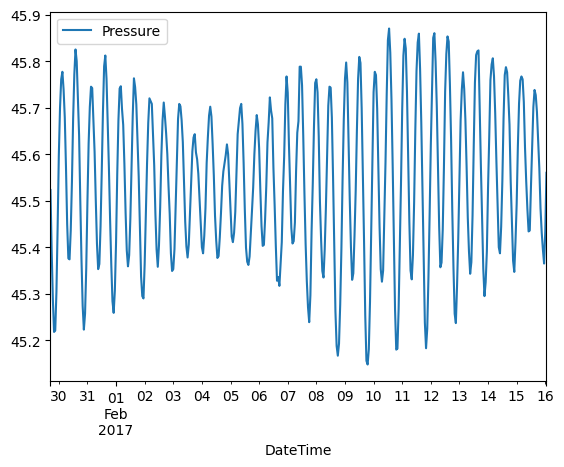

In [3]:
ds.plot(y="Pressure")

/tmp/ipykernel_29494/14948289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['mean'] =  df_temp.mean(axis=1)


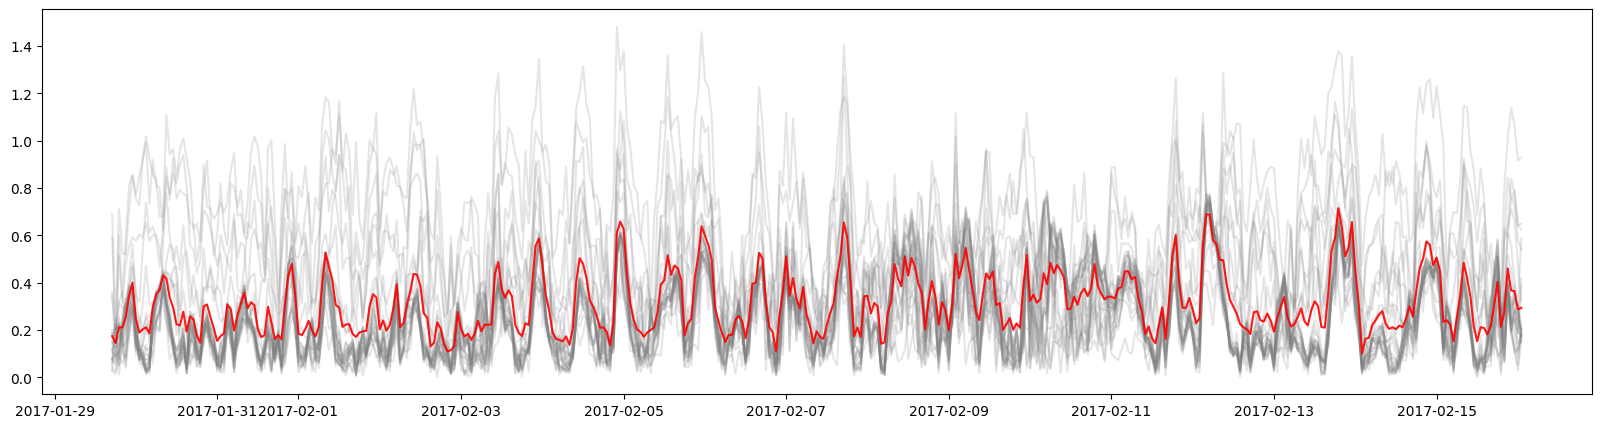

In [4]:
cols = ds.columns[ds.columns.str.contains("Speed")]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
df_temp = ds[cols]
df_temp['mean'] =  df_temp.mean(axis=1)
axes.plot(df_temp[cols], alpha=0.2, color="grey")
axes.plot(df_temp['mean'], alpha=0.9, color="red")

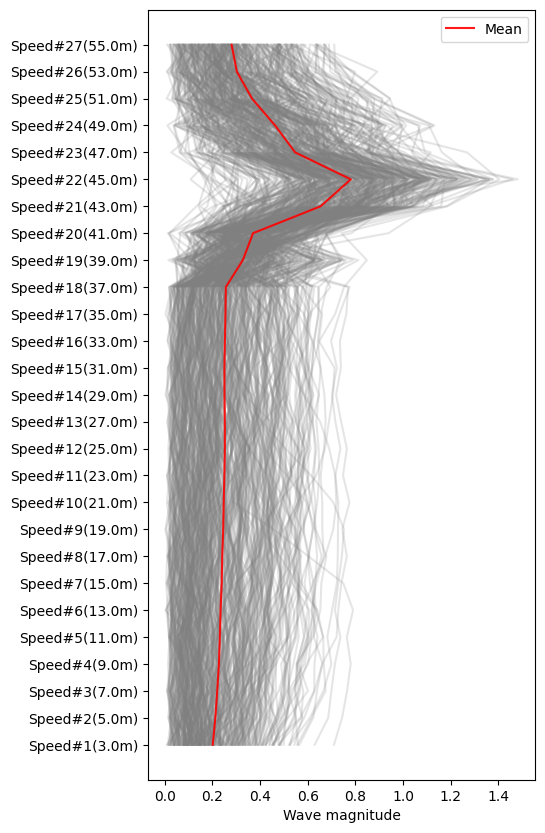

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
df_temp = ds[cols].T
df_temp['mean'] =  df_temp.mean(axis=1)

for col in df_temp.columns:
    if col != 'mean':
        axes.plot(df_temp[col],df_temp.index, alpha=0.2, color="grey")
axes.plot(df_temp['mean'], df_temp.index, alpha=0.9, color="red", label="Mean" )
plt.legend()
plt.xlabel("Wave magnitude")
plt.show()

## Visualise the Wave speed as a time series

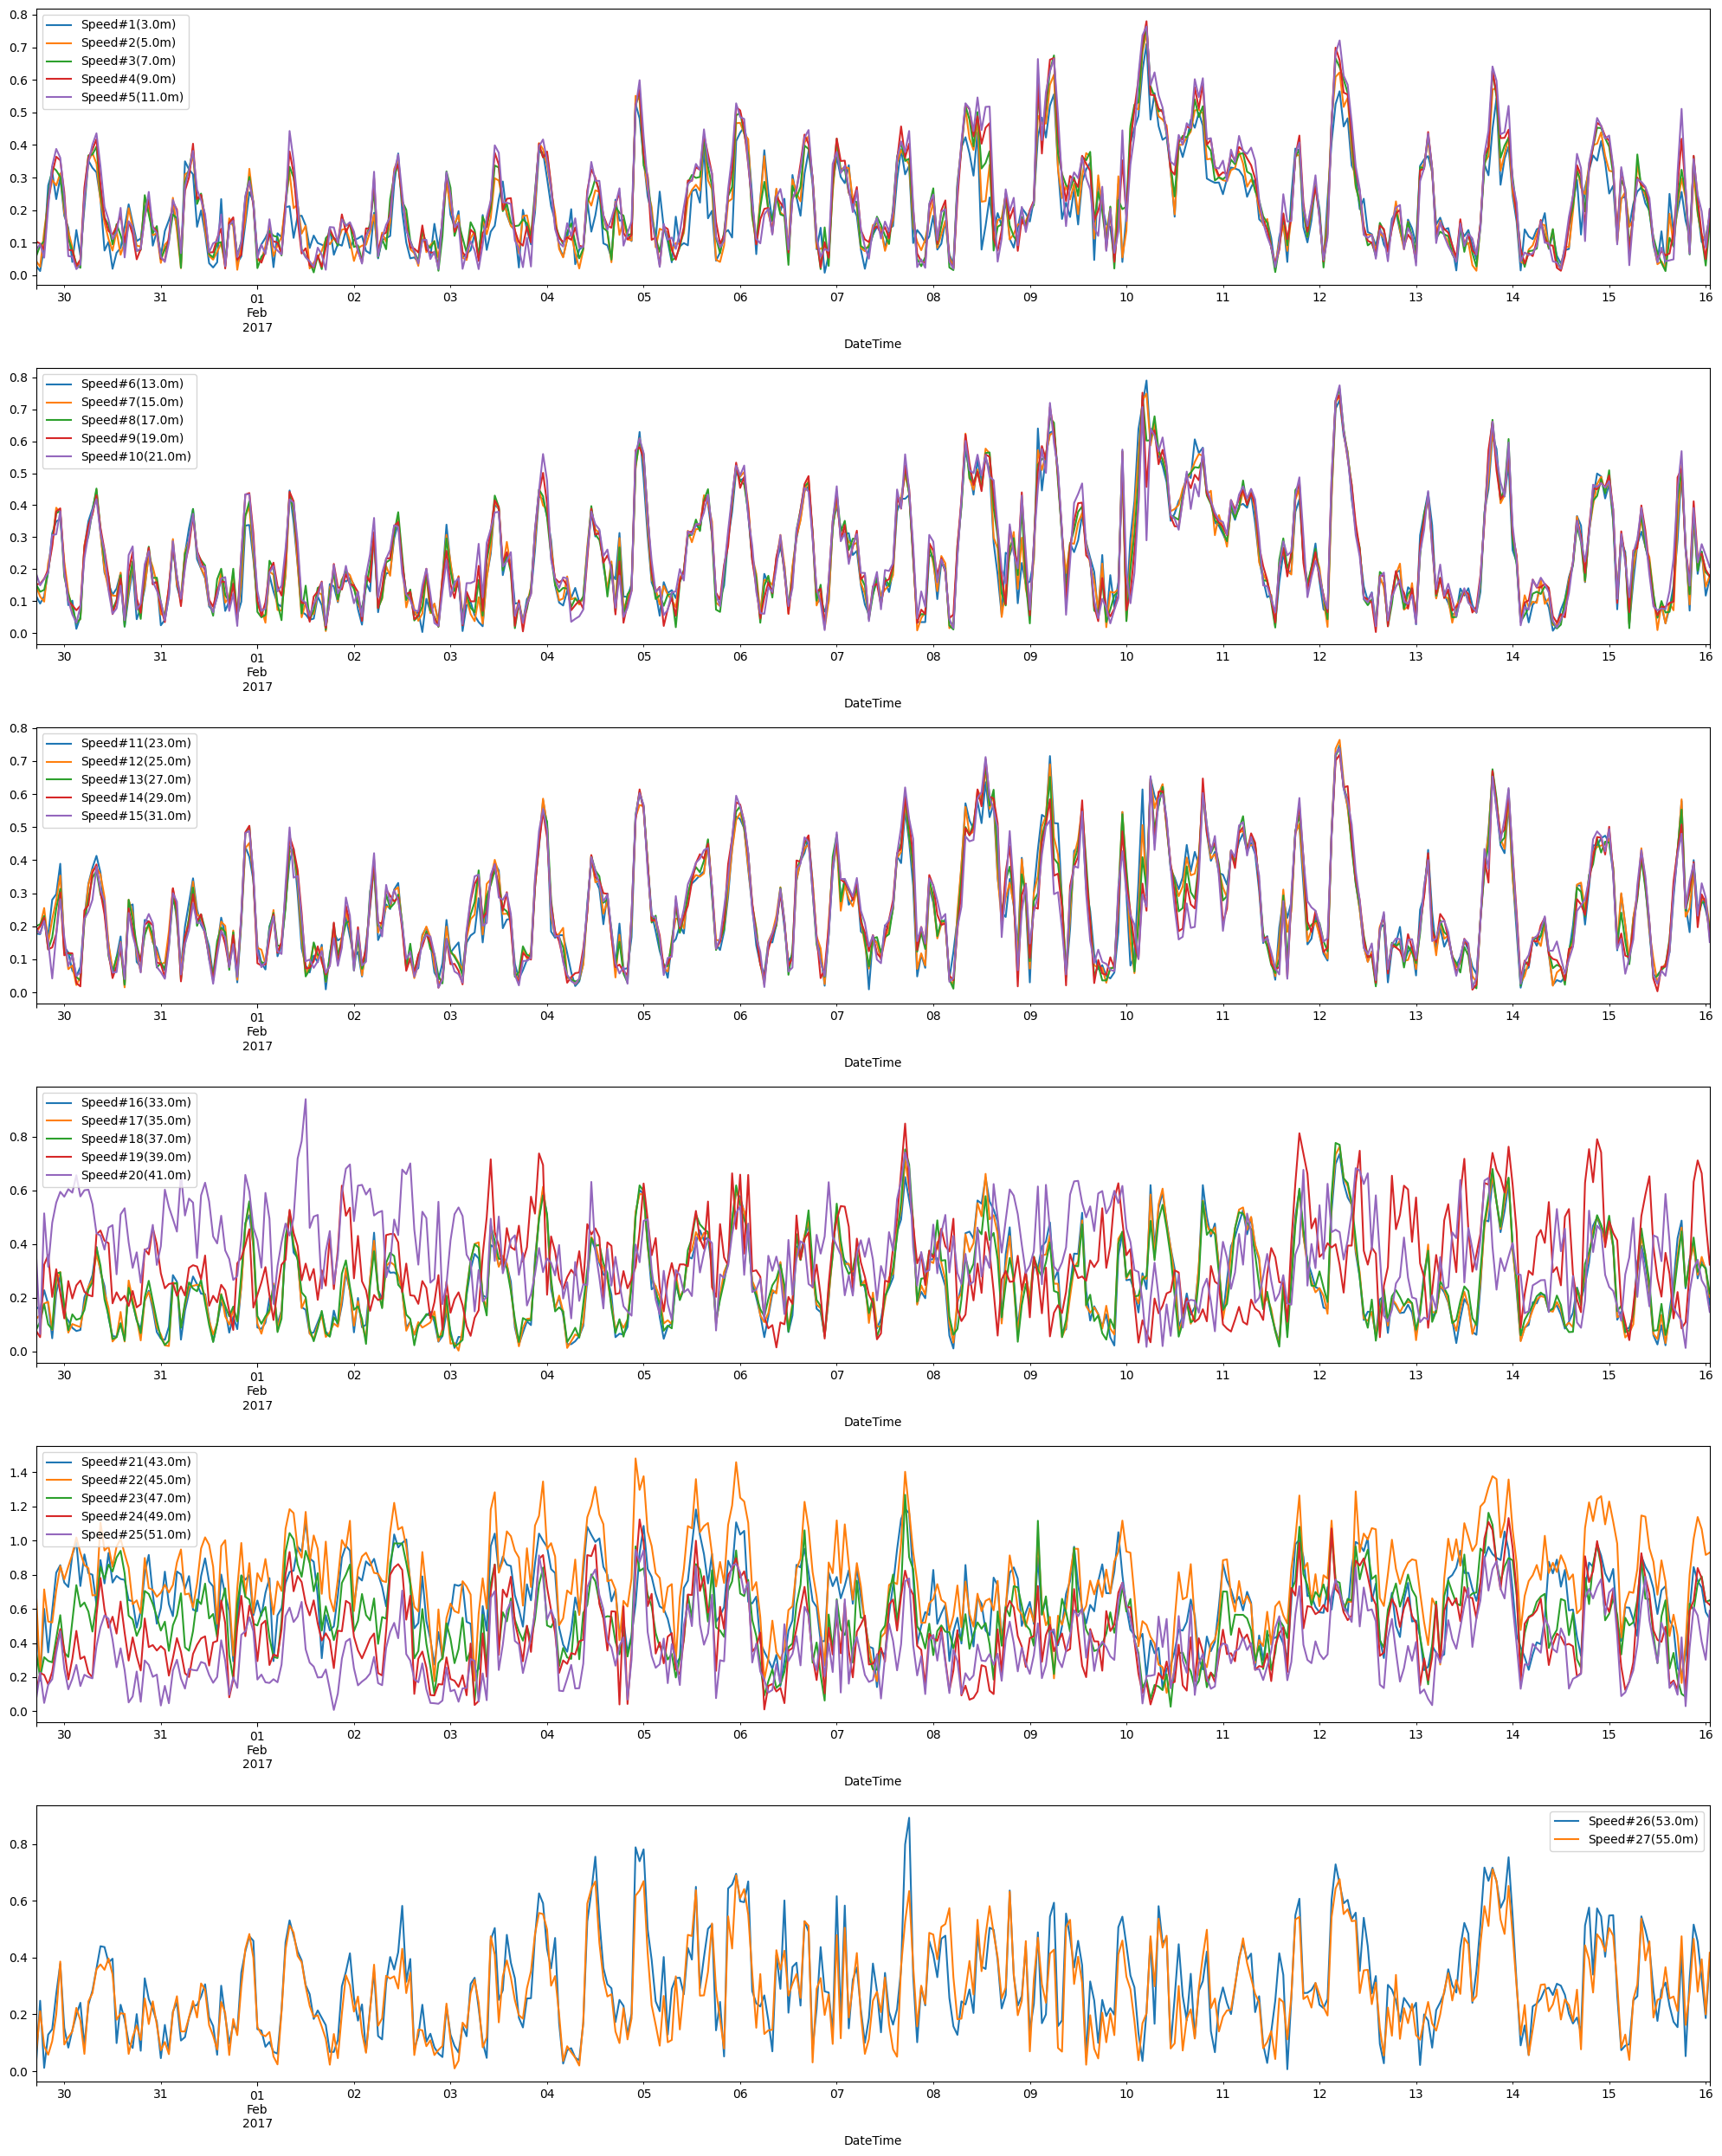

In [6]:


lines_per_graph = 5
num_graphs = int(np.ceil(len(cols)/lines_per_graph))
# Create subplots with 5 rows and 1 column
fig, axes = plt.subplots(nrows=num_graphs, ncols=1, figsize=(20, 25))

len(cols)/5
# Plot each column in a separate subplot
for i in range(num_graphs):
    col = i*lines_per_graph
    
    ds.plot(y=cols[col:min(col+lines_per_graph,len(cols))], ax=axes[i], kind='line')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Look at direction and magnitude of currents for selected data

Create a set of quiver plots using Matplotlib to visualize arrow data from a DataFrame (ds). Each subplot in the set represents the arrow data for a specific depth given the  speed information (Speed) and the other  direction information (Dir). 

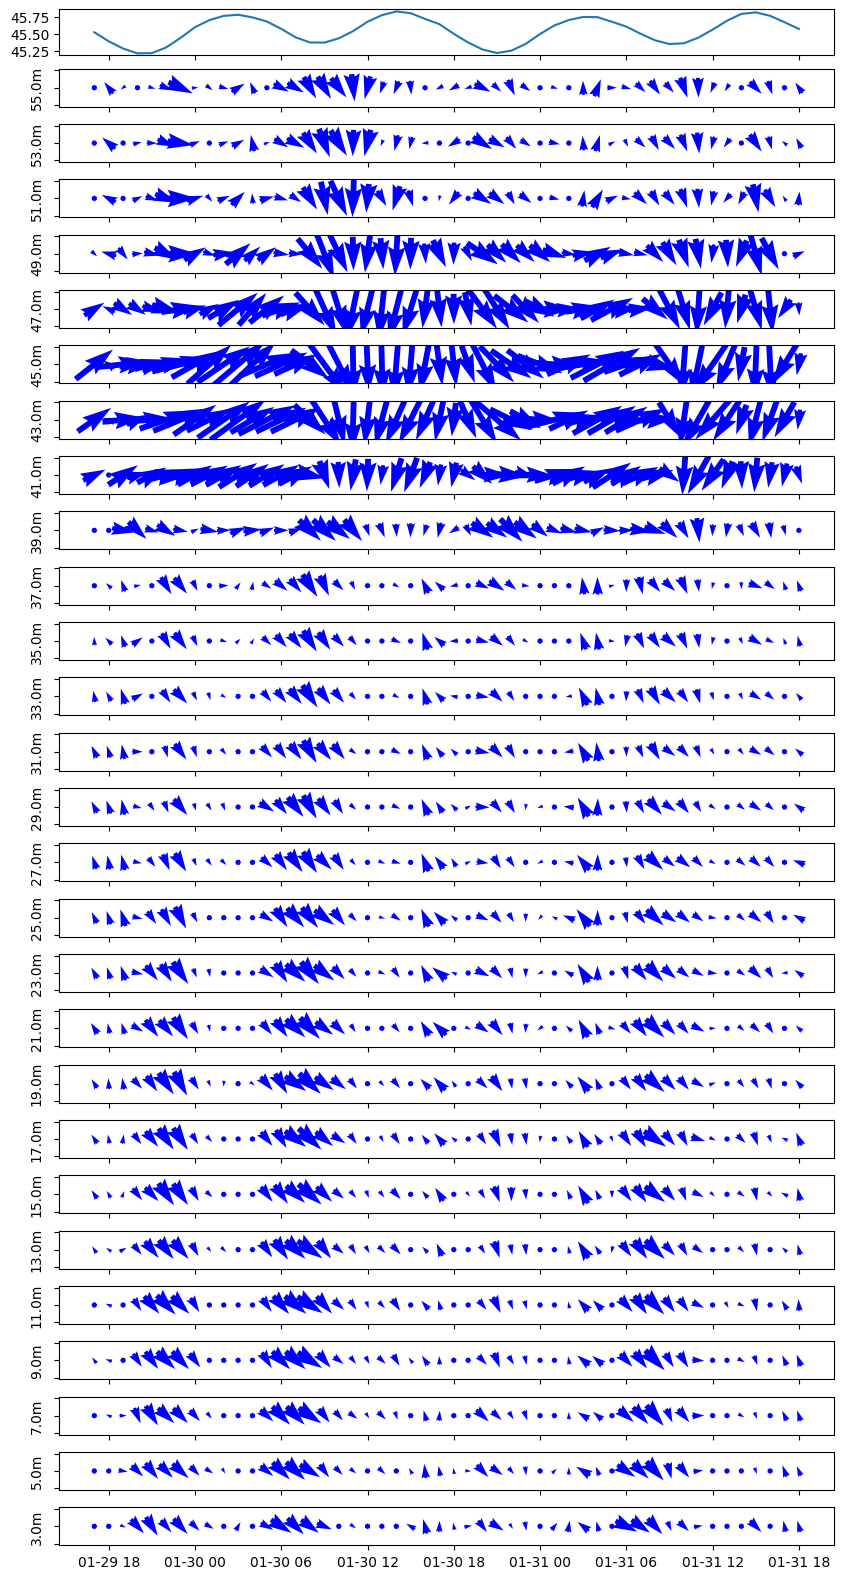

In [7]:

speeds = ds.columns[ds.columns.str.contains("Speed")]
dirs = ds.columns[ds.columns.str.contains("Dir")]

td = ds[:50]  # Visualize 50 dates
x = np.zeros(len(td))
# Assuming you have the rest of the code before this point

# Create a list to store subplots
fig, axes = plt.subplots(len(speeds)+1, 1, figsize=(10, 20), sharex=True)

axes[0].plot(td.index,td['Pressure'])

speed_ints = []
# Reverse the order of columns
for i, (speed_col, dir_col) in enumerate(reversed(list(zip(speeds, dirs)))):
    sizes = td[speed_col].to_numpy() / 10
    directions = np.deg2rad(td[dir_col].to_numpy())

    u = sizes * np.cos(directions)
    v = sizes * np.sin(directions)

    j=i+1
    axes[j].quiver(td.index, x, u, v, angles='uv', scale_units='xy', scale=0.5, color='blue', pivot='mid')
    ylabel = speed_col.split('(')[1][:-1]
    speed_ints.append(int(speed_col.split('(')[1][:-4]))
    axes[j].set_ylabel(ylabel)
    axes[j].set_yticklabels([])
    axes[j].set_aspect('equal')

plt.show()


In [8]:
# Assuming you have a DataFrame 'ds' with a column 'Pressure' and 'FluidDensity' and 'Gravity' are known constants
fluid_density = 1029  # kg/m^3 (for water)
gravity = 9.8  # m/s^2

# Add a new column 'Depth' to the DataFrame
 

ds2['depth'] = ds[['Pressure']]/ (fluid_density * gravity) * 10000
ds2

NameError: name 'ds2' is not defined